# Binomial Distribution

The Binomial distribution models the number of successes in a fixed number of repeated, independent Bernoulli trials, where each trial has only two possible outcomes - success or failure - and the probability of success is constant across trials.

This makes it one of the foundational tools in probability and statistics, showing up everywhere from coin flips to quality control to A/B testing.

### Formal definition
If
- *n* = number of trials
- *p* = probability of success on each trial
- *X* = number of success in those *n* trials
then *X* is distributed as a Binomial distribution, written as:
$$
X \sim Binomial(n, p)
$$

With probability mass function:
$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

This gives the probability of getting exactly *k* successes.

### Key properties
| Property | Probability | Statistics (Population) | Statistics (Sample) |
|---|---|---|---|
| **Mean** | $ E[X] = np $| $ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $ | $ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $ |
| **Variance** | $ \sigma^2 = np(1-p) $ | $ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 $ | $ s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $ |

### Example
Imagine flipping a fair coin 5 times.
Each flip is independent, has two outcomes, and the probability of heads is constant at 0.5.

The Binomial distribution tells you the probability of getting exactly 3 heads out of 5 flips.

In [ ]:
import scipy.special as spsp
import scipy.stats as stats

def binomial_pmf(k, n, p):
    """Return P(X=k) for X ~ Binomial(n, p)."""
    if not (0 <= k <= n):
        return 0.0
    coeff = spsp.comb(n, k, exact=True)
    return coeff * (p ** k) * ((1 - p) ** (n - k))

k, n, p = 3, 5, 0.5
manual_pmf = binomial_pmf(k, n, p)
scipy_pmf = stats.binom.pmf(k, n, p)
print("manual pmf =", manual_pmf)
print("scipy pmf  =", scipy_pmf)

manual pmf = 0.3125
scipy pmf  = 0.3124999999999998


### Plot
The Binomial distribution begins to converge to the Normal distribution as $ n \rightarrow \infty $.

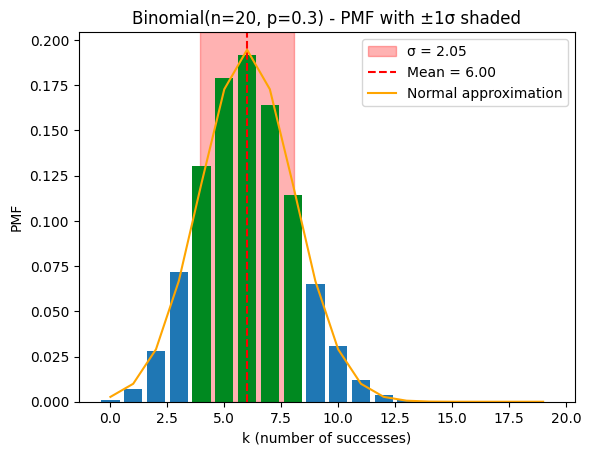

In [29]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def plot(n, p):
    mean = n * p
    std = np.sqrt(n * p * (1-p))
    ks = np.arange(0, n)
    binomial_ps = [stats.binom.pmf(k, n, p) for k in ks]
    normal_ps = [stats.norm.pdf(k, loc=mean, scale=std) for k in ks]

    fig, ax = plt.subplots()
    ax.set_title(f"Binomial(n={n}, p={p}) - PMF with ±1σ shaded")
    ax.set_xlabel("k (number of successes)")
    ax.set_ylabel("PMF")
    ax.axvspan(mean - std, mean + std, color="r", alpha=0.3, label=f"σ = {std:.2f}")
    ax.axvline(mean, color="r", linestyle="--", label=f"Mean = {mean:.2f}")
    bars = ax.bar(ks, binomial_ps)
    for k, bar in zip(ks, bars):
        if mean - std <= k <= mean + std:
            bar.set_facecolor("#008920")
    ax.plot(ks, normal_ps, color="orange", label="Normal approximation")
    ax.legend()
    plt.show()

plot(20, 0.3)

### Cumulative distribution function

The cumulative distribution function (CDF) gives the probability that *X* takes a value **less than or equal** to some integer *k*:
$$
F(k) = P(X<=k)
$$

Because the Binomial distribution is discrete, the CDF is a finite sum of PMF values:
$$
\sum_{i=0}^{k} \binom{n}{i} p^i (1-p)^{n-i}
$$

In [ ]:
import scipy.special as spsp
import scipy.stats as stats

def binom_pmf(k, n, p):
    if not (0 <= k <= n):
        return 0
    return spsp.binom(n, k) * p**k * (1-p)**(n-k)

def binom_cdf(k, n, p):
    result = 0
    for i in range(k+1):
        result += binom_pmf(i, n, p)
    return result

k, n, p = 3, 10, 0.3
print(f"PMF mine: {binom_pmf(k,n,p)}")
print(f"PMF scipy: {stats.binom.pmf(k,n,p)}\n")

print(f"CDF mine: {binom_cdf(k,n,p)}")
print(f"CDF scipy: {stats.binom.cdf(k, n, p)}")

PMF mine: 0.2668279319999998
PMF scipy: 0.2668279319999998

CDF mine: 0.6496107183999996
CDF scipy: 0.6496107184000001
